## HW3.4

In [1]:
# set up directory
dir_counts <- "~/Documents/Dev/SRCourse/original/Applied-Bioinformatics/Unit2-RNAseq/data/htseq_out/day5"
counts_files <- list.files(dir_counts)

In [2]:
# set up sample info
samplesInfo <- as.data.frame(matrix(ncol=2, nrow=length(counts_files)))  
samplesInfo$samplename <- counts_files  
samplesInfo$filename <- counts_files  
samplesInfo$group <- c("mock", "ZIKV", "mock", "ZIKV", "mock", "ZIKV") 
samplesInfo <- samplesInfo[,-c(1:2)]

In [3]:
samplesInfo
class(samplesInfo)

samplename,filename,group
GSM2580321_counts.txt,GSM2580321_counts.txt,mock
GSM2580322_counts.txt,GSM2580322_counts.txt,ZIKV
GSM2580325_counts.txt,GSM2580325_counts.txt,mock
GSM2580326_counts.txt,GSM2580326_counts.txt,ZIKV
GSM2580329_counts.txt,GSM2580329_counts.txt,mock
GSM2580330_counts.txt,GSM2580330_counts.txt,ZIKV


[1] "data.frame"

In [82]:
library("DESeq2")
dds1 <- DESeqDataSetFromHTSeqCount(sampleTable = samplesInfo, 
                                           directory = dir_counts, 
                                           design = ~ group)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”

In [5]:
colData(dds1)

DataFrame with 6 rows and 1 column
                         group
                      <factor>
GSM2580321_counts.txt     mock
GSM2580322_counts.txt     ZIKV
GSM2580325_counts.txt     mock
GSM2580326_counts.txt     ZIKV
GSM2580329_counts.txt     mock
GSM2580330_counts.txt     ZIKV

In [6]:
dds1_deseq <- DESeq(dds1)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


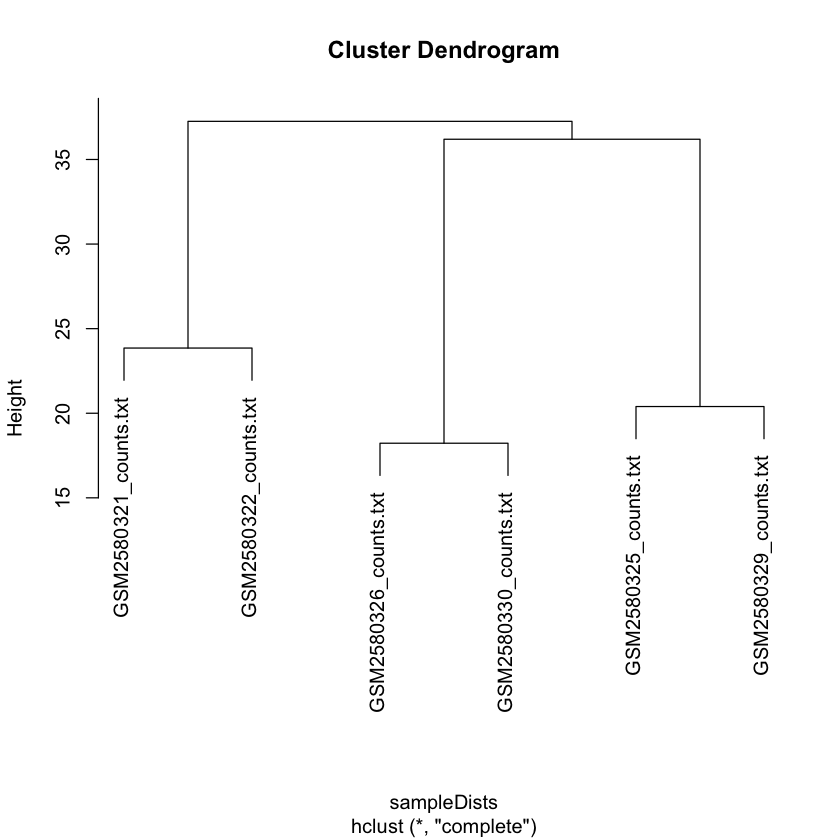

In [7]:
vsd <- varianceStabilizingTransformation(dds1_deseq)
sampleDists <- dist(t(assay(vsd)))
plot(hclust(sampleDists))

## HW3.5
**1) Repeat the hierarchical clustering using rlog-normalized counts instead of vsd.**

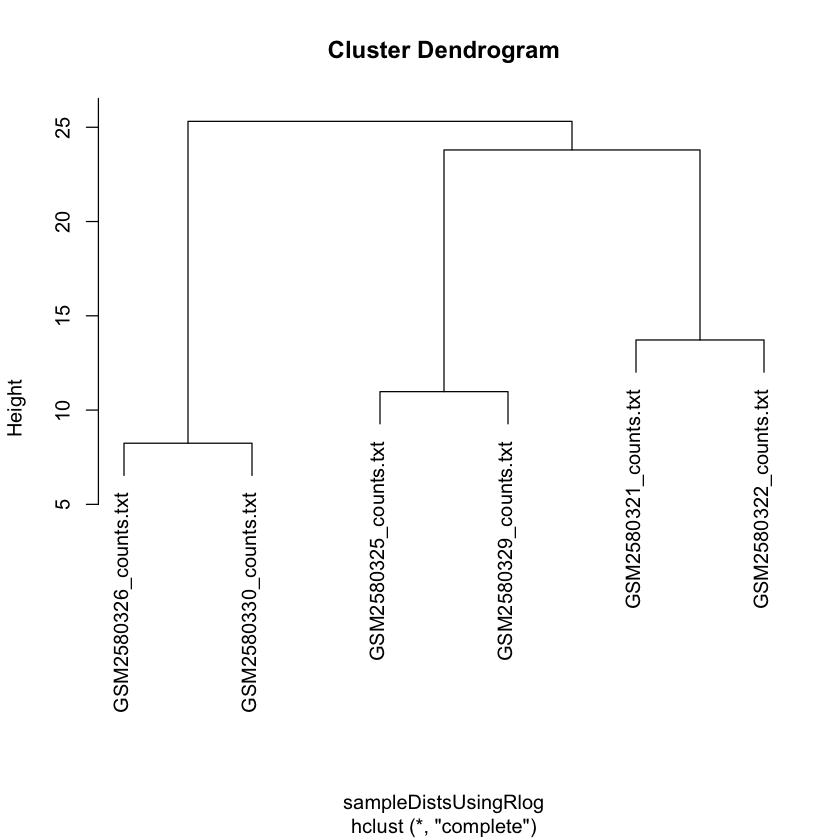

In [8]:
## perform r-log normalization
rld <- rlog(dds1_deseq)
## perform hierarchical clustering using rlog
sampleDistsUsingRlog <- dist(t(assay(rld)))
plot(hclust(sampleDistsUsingRlog))

**2) Examine the normalized counts using `head(assay(vsd))` and `head(assay(rld))`. Now find the corresponding raw counts and plot raw vs normalized counts for the first 6 genes of the first sample. HINT: It is possible to extract elements from `dds1`, including raw counts. **

In [17]:
normalized_vsd  <- head(assay(vsd))
normalized_vsd

,GSM2580321_counts.txt,GSM2580322_counts.txt,GSM2580325_counts.txt,GSM2580326_counts.txt,GSM2580329_counts.txt,GSM2580330_counts.txt
ENSG00000000003,10.581933,10.351826,10.554269,10.311659,10.431451,10.199156
ENSG00000000005,7.543589,7.462387,7.543006,7.528540,7.569880,7.569783
ENSG00000000419,10.112493,10.064517,10.172314,10.165253,10.005934,10.059106
ENSG00000000457,9.573418,9.568217,9.604100,9.542536,9.608829,9.666379
ENSG00000000460,9.527347,9.437986,9.518270,9.355540,9.416553,9.445563
ENSG00000000938,7.517564,7.600088,7.511530,7.766691,7.432395,7.817386


In [16]:
normalized_rld <- head(assay(rld))
normalized_rld

,GSM2580321_counts.txt,GSM2580322_counts.txt,GSM2580325_counts.txt,GSM2580326_counts.txt,GSM2580329_counts.txt,GSM2580330_counts.txt
ENSG00000000003,10.196392,10.023092,10.174645,9.993082,10.083329,9.907657
ENSG00000000005,2.676511,2.660325,2.676335,2.673147,2.684148,2.683100
ENSG00000000419,9.678356,9.642046,9.723202,9.718194,9.595497,9.637688
ENSG00000000457,8.948431,8.944551,8.971801,8.925098,8.976018,9.020128
ENSG00000000460,8.804458,8.736003,8.796647,8.673637,8.718293,8.741719
ENSG00000000938,3.406941,3.427750,3.407257,3.483098,3.382787,3.507106


In [18]:
raw_count <- head(assay(dds1))
raw_count

,GSM2580321_counts.txt,GSM2580322_counts.txt,GSM2580325_counts.txt,GSM2580326_counts.txt,GSM2580329_counts.txt,GSM2580330_counts.txt
ENSG00000000003,1138,880,930,833,2113,919
ENSG00000000005,6,3,5,5,15,8
ENSG00000000419,754,680,666,731,1443,809
ENSG00000000457,447,419,386,400,979,554
ENSG00000000460,426,365,353,327,799,440
ENSG00000000938,5,8,4,17,5,25


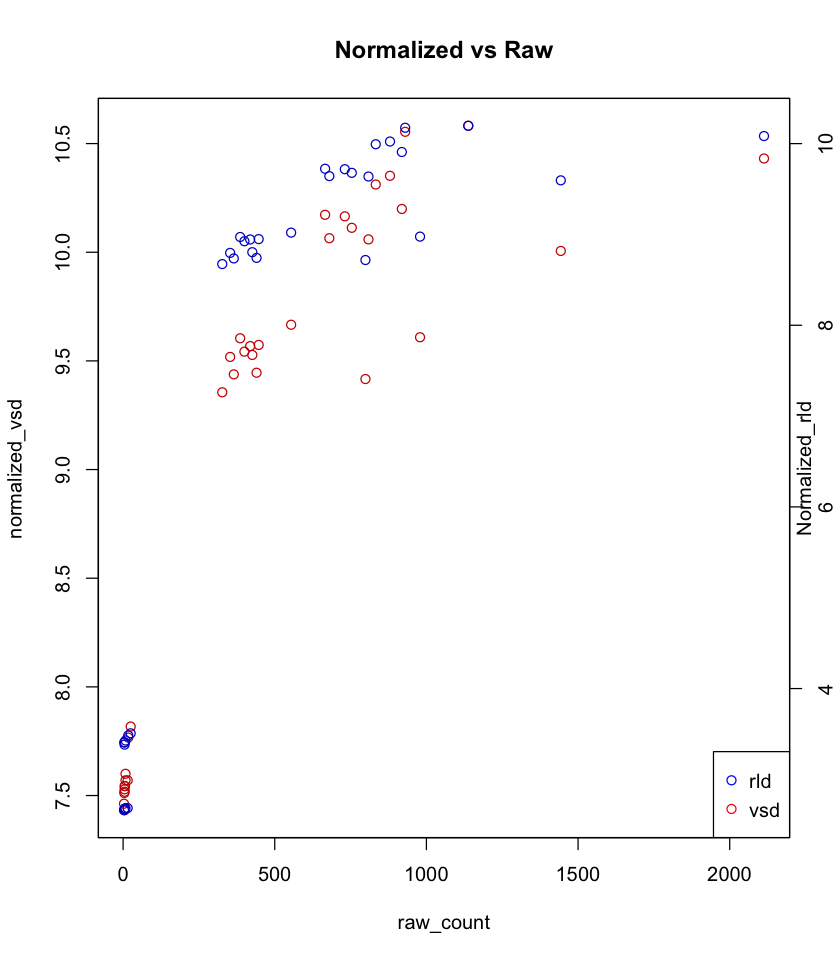

In [81]:
options(repr.plot.width=7, repr.plot.height=8)
plot(raw_count,normalized_vsd, col = "red3", main = "Normalized vs Raw")
par(new = TRUE)
plot(raw_count,normalized_rld, col = "blue3", xlab = "", ylab = "", xaxt = "n", yaxt = "n")
axis(side = 4)
mtext("Normalized_rld", side = 4, line = 0.1)
legend("bottomright", c("rld", "vsd"),
       col = c("blue", "red"), pch = c(1,1))

---